<a href="https://colab.research.google.com/github/anismousse/bbg_ml/blob/master/fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4423680/4422102 [==============================] - 0s 0us/step


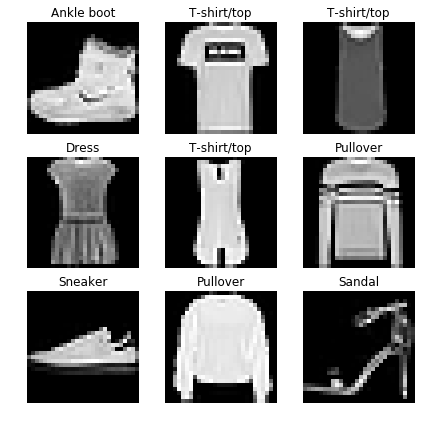

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

plt.rcParams['figure.figsize'] = (7,7)
offset = 0
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress",
          "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i+offset], cmap='gray', interpolation='none')
    plt.title(labels[y_train[i+offset]])
    plt.axis('off')

# Import and hyper parameters


In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

In [0]:
# hyper paramters
batch_size = 1128
epochs = 10
learn_rate = 0.001
dropout= 0.3

# load data
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress",
          "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
num_class = len(class_names)
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Data exploration


In [4]:
X_train.shape

(60000, 28, 28)

In [15]:
y_train[1]

0

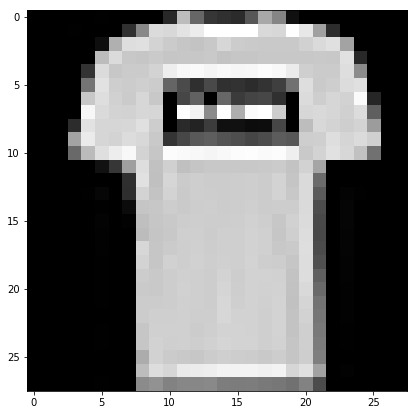

In [14]:
plt.imshow(X_train[1], cmap='gray', interpolation='none')

 We need to normalized the data
 

In [0]:
# features normalization
X_train = X_train.astype('float32')/255 # grayscale
X_test = X_test.astype('float32')/255

#Converter class into binary class
y_train = tf.keras.utils.to_categorical(y_train,num_classes=num_class)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=num_class)


 need to add another dimension a convolution is is expecting 3 dimension 
 

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Create the model


Basic model using convolution


In [25]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(10,(3,3),input_shape=X_train.shape[1:],padding='same' ,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten()) # the aim here witht he flatten is to remove the batch size dimension
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(num_class,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learn_rate),metrics=['accuracy'])

model.fit(X_train, y_train, epochs=epochs,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 393us/sample - loss: 0.4207 - acc: 0.8528 - val_loss: 0.3518 - val_acc: 0.8738
Epoch 2/10
60000/60000 [==============================] - 23s 385us/sample - loss: 0.2899 - acc: 0.8952 - val_loss: 0.3041 - val_acc: 0.8923
Epoch 3/10
60000/60000 [==============================] - 24s 397us/sample - loss: 0.2482 - acc: 0.9094 - val_loss: 0.2820 - val_acc: 0.8988
Epoch 4/10
60000/60000 [==============================] - 24s 395us/sample - loss: 0.2207 - acc: 0.9176 - val_loss: 0.2670 - val_acc: 0.9046
Epoch 5/10
60000/60000 [==============================] - 24s 402us/sample - loss: 0.1994 - acc: 0.9271 - val_loss: 0.2649 - val_acc: 0.9051
Epoch 6/10
60000/60000 [==============================] - 25s 415us/sample - loss: 0.1797 - acc: 0.9326 - val_loss: 0.2625 - val_acc: 0.9070
Epoch 7/10
60000/60000 [==============================] - 25s 420us/sample - loss: 0.1649 - acc: 0.9389 

We can easily see that ***Val_acc is below acc*** so we are **overfitting**. We then need to add more complexity

In [26]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(10,(3,3),input_shape=X_train.shape[1:],padding='same' ,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(dropout))
model.add(tf.keras.layers.Conv2D(20,(3,3),input_shape=X_train.shape[1:],padding='same' ,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(dropout))
model.add(tf.keras.layers.Conv2D(40,(3,3),input_shape=X_train.shape[1:],padding='same' ,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(dropout))
model.add(tf.keras.layers.Flatten()) # the aim here witht he flatten is to remove the batch size dimension
model.add(tf.keras.layers.Dropout(dropout))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(num_class,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learn_rate),metrics=['accuracy'])

model.fit(X_train, y_train, epochs=epochs,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 45s 754us/sample - loss: 0.7070 - acc: 0.7351 - val_loss: 0.4633 - val_acc: 0.8381
Epoch 2/10
60000/60000 [==============================] - 45s 753us/sample - loss: 0.4818 - acc: 0.8210 - val_loss: 0.4044 - val_acc: 0.8517
Epoch 3/10
60000/60000 [==============================] - 45s 746us/sample - loss: 0.4346 - acc: 0.8386 - val_loss: 0.3635 - val_acc: 0.8660
Epoch 4/10
60000/60000 [==============================] - 46s 767us/sample - loss: 0.4032 - acc: 0.8495 - val_loss: 0.3506 - val_acc: 0.8747
Epoch 5/10
60000/60000 [==============================] - 46s 769us/sample - loss: 0.3809 - acc: 0.8571 - val_loss: 0.3258 - val_acc: 0.8820
Epoch 6/10
60000/60000 [==============================] - 45s 747us/sample - loss: 0.3636 - acc: 0.8635 - val_loss: 0.3107 - val_acc: 0.8889
Epoch 7/10
60000/60000 [==============================] - 45s 747us/sample - loss: 0.3531 - acc: 0.8683 